This notebook aims at computing a precise estimate of the dynamic parameters of the equivalent circuit model, namely R0, R1 and C1. The data used to give that estimation must satisfy a few criteria : 
- Battery must have been at rest before logging start, which means that the parameter allowing logging to start should be set in QGC.
- The log should cover the entirecharge range of the battery, i.e. the battery should go form 100% charge to 0% during the log, so that the different battery behaviors at all states of charge are captured.
- If the estimation is performed on several logs, all logs should come from the same battery with similar age. 
- Total capacity Q and coulombic efficiency eta (statis parameters) should be computed on that very same battery, in the same condition as the dynamic tests.


In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/lucas/Documents/Log_Analysis/Battery')
import analog
import matplotlib.pyplot as plt
%matplotlib notebook


In [32]:
curve = OCVcurve('SOCvsOCV_discharge200mA.csv')

log_file = analog.pathfromQGC('/home/lucas/Documents/Log_Analysis/Logs',index=34)
print(log_file)
info = analog.logextract(log_file,'battery_status')

current = info['battery_current']
time = info['time_bs']
voltage = info['battery_voltage']/4
print(voltage[0])

dt = np.diff(time)
z0 = 1 # initial state of charge of the battery
Q = 6500*3600/1000
z = np.array([z0])
z = np.concatenate([z,z0 - np.cumsum(current[:-1]*dt)/Q])

voltage_eq = curve.OCVfromSOC(z)

vtilda = voltage - voltage_eq

/home/lucas/Documents/Log_Analysis/Logs/log_34_2019-8-27-13-52-42.ulg
3.5674803


<IPython.core.display.Javascript object>


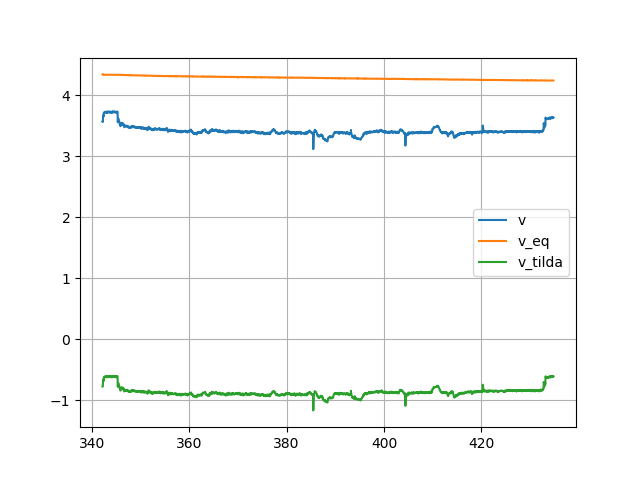

In [46]:
%matplotlib notebook
plt.figure()
plt.plot(time,voltage,label='v')
plt.plot(time,voltage_eq,label='v_eq')
plt.plot(time,vtilda,label='v_tilda')
plt.legend()
plt.grid()

<IPython.core.display.Javascript object>


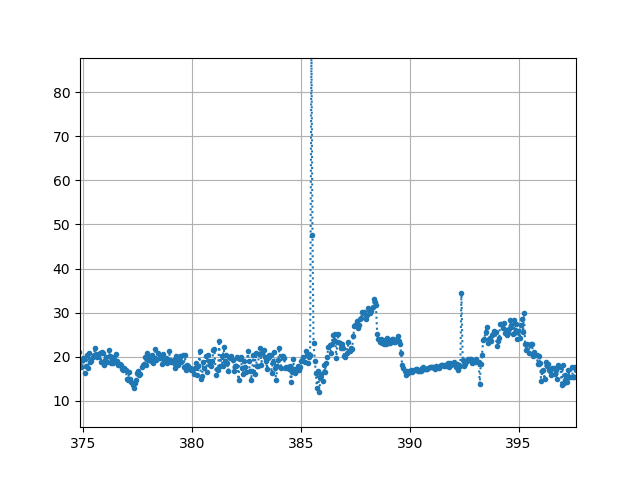

In [53]:
plt.figure()
plt.plot(time,current,'.:')
plt.grid()
plt.show()

In [55]:
1/np.mean(dt)

19.141805935464387